# Projet Maths 3

# Questions théoriques

> **1. Quel théorème du cours nous autorise-t-il à estimer l’espérance conditionnelle par la moyenne empirique de simulations conditionnelles.**


> **2. Rappeler la loi conditionnelle du vecteur des composantes de Z correspondant aux points de discrétisation sans observation, connaissant les valeurs prises par les composantes aux sites d’observation.**



> **3. Si Y = (Y1, . . . , Yp) est un vecteur de composantes gaussiennes indépendantes, toutes d’espérance nulle et de variance 1, quelle est la loi du vecteur Z = m + RY où R est une matrice p × p et m est un vecteur de taille p ?**

Si Y est un vecteur de composantes gaussiennes indépendantes, toutes d'esperance nulle et de variance 1,  alors on peut caractériser cette variable aléatoire par sa fonction caractéristiques $\Phi_Y(u) =e^{i<u|m>-\frac{1}{2} <u|I_n u>} $

Or d'après le cours de Probabilté $\Phi_Z(u) = \Phi_{m+RY}(u) = e^{i<u|m>}\Phi_Y(R^\perp u)$

Ce qui dans notre cas nous donne : 

$\Phi_Z(u) = \Phi_{m+RY}(u) = e^{i<u|m>}\Phi_Y(R^\perp u)$

Donc Z suit la loi qui a pour fonction caractéristique : 
$\Phi_Z(u) = \Phi_{m+RY}(u) = e^{i<u|m>-\frac{1}{2} <R^\perp u|I_n R^\perp u>}$


> **4. En déduire un algorithme de simulation conditionnelle.**

On en déduit donc qu'en utilisant une matrice R bien choisie on peut arriver simuler un vecteur gaussien conditionnel

En effet si on choisit la transformée de Cholesky de la matrice de covariance conditionelle C', que l'on notera R:
En posant Z'  = m +RY où Y = (Y1, . . . , Yp) est un vecteur de composantes gaussiennes indépendantes, toutes d’espérance nulle et de variance 1

$\Phi_Z'(u) = e^{i<u|m> -\frac{1}{2}<R^\perp u|R^\perp u> }
 =  e^{i< u|m> -\frac{1}{2} <u|Cu>}$ ( par symétrie de R ) 
 
$ \Phi_Z'(u) = e^{i<u| m>-\frac{1}{2} <u|Cu>}$

Donc Z' est une variable aléatoire à densité, Z' est un un vecteur gaussien

De plus Z'est de même loi que la variable aléatoire gaussienne $Z|Z(x_1, ...,x_i) = (z_1, ..., z_i)$ par idnetification des fonctions caractéristiqes

In [76]:
# chargement dee dépendances 

import numpy as np 
import math
import matplotlib.pyplot as plt 
import random

In [17]:
#Discrétisation
A=0
B=500
N=101

#Nombre de points de discrétisation 
Delta = (B-A)/(N-1)
discretization_indexes = np.arange(N) 
discretization = discretization_indexes*Delta 

#Paramètres du modèle
mu=-5
a = 50 
sigma2 = 12

#Données
observation_indexes = [0,20,40,60,80,100]
depth = np.array([0,-4,-12.8,-1,-6.5,0])
#Indices des composantes correspondant aux observations et aux componsantes non observées
unknown_indexes=list(set(discretization_indexes)-set(observation_indexes))


In [91]:
mu_vect = [mu for i in range(N)]

In [92]:
def C(h, a, sig_2):
    return (np.exp(-abs(h)/a)*sig_2)



In [93]:
def mat_distance(discretization):
    M=np.ones((len(discretization),len(discretization)))
    for i in range(len(discretization)):
        for j in range(len(discretization)):
            M[i,j] = abs(discretization[i] - discretization[j])
    return M 

In [94]:
covar = C(mat_distance(discretization), a, sigma2)

In [95]:
rows = np.array(observation_indexes, dtype=np.intp)
columns = np.array(observation_indexes, dtype=np.intp)
covar_obs_obs = covar[rows[:, np.newaxis], columns]

rows = np.array(unknown_indexes, dtype=np.intp)
columns = np.array(unknown_indexes, dtype=np.intp)
covar_unk_unk = covar[rows[:, np.newaxis], columns]

rows = np.array(unknown_indexes, dtype=np.intp)
columns = np.array(observation_indexes, dtype=np.intp)
covar_obs_unk= covar[rows[:, np.newaxis], columns]

In [108]:
esp_cond = np.array([mu for i in range(N - len(observation_indexes))]) +  covar_obs_unk @ np.linalg.inv(covar_obs_obs)@(np.array(depth) - [mu for i in range( len( observation_indexes)) ])

In [109]:
cov_cond = covar_unk_unk - covar_obs_unk@np.linalg.inv(covar_obs_obs) @ covar_obs_unk.transpose()

In [110]:
X=[ cov_cond[i,i] for i in range (len(cov_cond))]

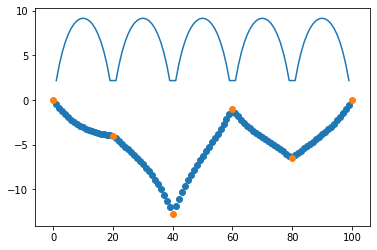

In [111]:
plt.scatter(unknown_indexes,esp_cond)
plt.scatter(observation_indexes,depth)
plt.plot(unknown_indexes,X)

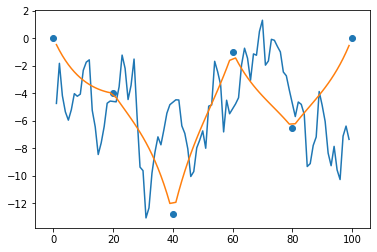

In [125]:
L = np.linalg.cholesky(cov_cond)
def simul( L ):
    f= lambda u,v : np.sqrt(-2*np.log(u))*np.cos(2*np.pi*v)
    g= lambda u,v : np.sqrt(-2*np.log(u))*np.sin(2*np.pi*v)
    Y = np.random.normal(0,1,len(unknown_indexes))
    Z = np.array([mu for i in range(len( unknown_indexes))])+ L@ Y
    return Z
Z = simul(L)
plt.plot(unknown_indexes,Z)


plt.plot(unknown_indexes, esp_cond)

plt.scatter(observation_indexes,depth)

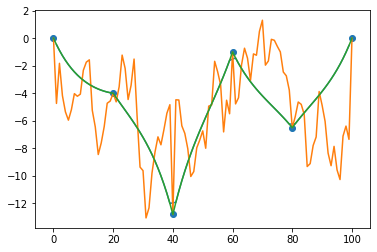

In [129]:
def builder(depth,observation_indexes, Z , N):
    prof = []
    depth_ =list(depth)
    Z_ = list(Z)
    for i in range (N):

        if i in observation_indexes :
            prof.append(depth_.pop(0))
        else : 
            prof.append(Z_.pop(0))
    return prof
prof = builder(depth, observation_indexes,Z,N)

plt.plot(unknown_indexes, esp_cond)
plt.plot(prof)
plt.scatter(observation_indexes,depth)
plt.plot(builder(depth,observation_indexes,esp_cond,N))

def longueur ( prof, delta):
    S = 0
    for i in range(1,len(prof)):
        S+= np.sqrt(delta**2 +(prof[i]-prof[i-1])**2)
        print(S)
    return S





In [130]:
def simul_N ( Number , Delta):
    length = []
    for i in range (Number):
        length.append(longueur(builder(depth,observation_indexes,simul(L),N),Delta))
    return np.mean(length)

simul_N(100,Delta)


8.315447639544209
13.325819695906148
18.358718125167282
23.403981937034583
28.54676440702277
33.79122792279103
38.810943046843356
44.12396684787747
49.43010073006074
54.5383472578568
59.580260617194476
64.61797412628079
69.70789171003716
74.73744504963193
79.73768704983678
85.2372806361147
90.40227409584153
95.47202310242487
100.79511885426325
106.22709862809177
111.25131089267181
116.31532148728387
121.53549137555635
126.54806330344135
131.55348274705037
136.8180478033301
141.83929804182415
146.9397724646323
152.84843608087908
157.87142551847685
164.16446608270522
169.20923627766965
174.39827995545187
180.30544040996097
185.30596171854737
191.21747961301386
196.44658207496227
201.97351532485743
206.97505517312268
217.3894553336849
228.28732009442933
233.46921523745115
238.47065717368432
243.50371522462237
248.5403112933499
253.54782063161016
258.67982412672364
264.3719804498773
269.57580219221444
274.5927072384729
279.613430795412
284.61432795167207
290.28157155562735
295.339157212020

258.70158972732247
263.7015957408473
268.7174521438084
274.26395715447933
279.5226295318624
284.6360756968582
290.01585391919485
295.6066300021647
300.659450231396
305.8159831881676
311.0458379147269
316.14326830974994
321.5864166498766
328.63497668277694
333.75224516108614
338.82319873230415
344.1103274322697
349.19198315889497
354.1965741757192
359.35411548399134
364.394077999603
369.40861364631036
374.91757402440265
380.14498949503525
385.2337910757537
390.233901369463
395.93186767933844
401.0741330062622
406.2298791405466
411.2549097388563
416.27700885812885
421.45330135705836
426.45342327160455
431.47974758393957
436.57448994267463
441.5893162755384
446.6327332856997
451.63404044913904
456.72396367218124
461.7989827440847
466.8080310179755
472.1102155919935
477.59598400193954
483.16389977438206
488.2580132177252
493.32222972536107
498.50785241298206
503.57908648360313
508.9528470680091
514.1824017016834
519.2020398123929
524.2025198370688
531.8825505266987
6.952573610445123
11.984

97.89781747626797
102.90984952390802
108.36358230274138
113.4073655562651
118.57072065066492
123.64214761105964
128.64822279765883
133.90646858237747
139.51843395668197
144.52358123977666
150.2710265944936
155.29414762530536
160.38924832684714
165.3904489277115
170.40590324646598
175.46564217613306
180.7458054958287
185.80699025495088
190.97552162302313
195.97570825105848
201.0583777846784
206.15508620998892
215.11451152833592
224.20456641730428
229.20649523307114
234.21589014528567
239.33050314162426
244.44021168098055
249.57248410783677
254.57253687370078
259.67822617226403
264.6827643151853
269.81683659875387
275.0746402006765
280.2999493609363
285.47158655412034
290.73629062701633
295.74262997461466
301.09312831653097
306.7384569098329
311.76674873619174
316.8552575575542
322.9894854562614
329.42959793539933
334.4437419989858
339.4786405346714
344.6466855376296
349.73519031056486
355.5237758700409
360.541750072047
365.61413129838115
370.6398135812137
375.6625941138324
381.036709592

319.4520791895237
325.1128585617103
333.4653754982365
338.95199000735295
343.98763003328554
348.9933417559119
353.99912515328145
359.00153441757004
364.0294310218403
369.07820628284975
374.31491793182755
379.9016065618825
384.955612771938
390.0834041816949
395.2929442007566
401.0328707320721
406.17918570104666
411.1794689104379
416.230785339153
421.2687888100076
426.2834255912943
431.70748936822235
437.21324790742545
442.2589719715294
447.2729402633779
452.325783110224
458.2032701223917
463.2035275681682
468.4652166852784
473.5799234125141
478.67621456009715
484.0002835417553
489.0264644142997
494.06391425420134
499.06529741836016
504.07739448843046
509.2724479339892
514.4500586770615
519.6717246802106
524.8416225849663
529.8627970488855
537.6675642844408
5.9177012072753055
11.140778398288013
16.41937792108184
22.50977507868906
27.73717464957626
32.75656873212011
38.2474639658231
43.24757089484936
48.74266729044897
53.74524383878095
58.74873362020432
64.10345150399299
69.21616054273825

159.4753125644593
164.62902060944913
169.6294959640305
174.6444892661846
179.65758623302045
185.5280445036335
190.59801816935607
195.90968504523283
200.917169145884
205.9258235844246
215.74582225417583
225.18002094959706
230.28429795011198
235.87523006646248
240.9766458330458
245.9769206437244
252.15080595665071
257.4700341899436
262.5590990724381
268.68909520972
274.68401149149736
279.69270715734893
284.7064316722557
289.8220944874447
294.8229779615114
300.45727312616566
305.63353644826066
310.6428800429622
316.04246444152506
321.04394058331417
328.60600672112025
335.6528310122186
341.38367860343016
346.3931578176437
351.4583547844946
356.56095811564046
361.7037265460631
367.5339935041311
372.7979923657146
377.9937026648562
382.99467612388145
388.22990912170593
393.30761256857505
398.30847193103875
403.3651903313928
408.41753706365864
413.4217294507305
418.6718619410338
424.00809268064495
429.20242643780165
435.48002672842335
440.9678801304356
446.13970455062804
451.7728689076497
456.

158.3467524809559
163.36037667247984
168.92718879262958
174.7750898038617
179.95299388258752
185.31041508145
190.4027335598391
195.59776431661336
200.73901080973243
205.75239037838656
218.17689105611032
228.62481985184786
233.62977379389991
238.65391729689665
243.65444223136527
248.66039519113454
253.77524209175388
258.79481267507373
263.90136330663915
268.9133253098706
273.92303310026546
279.2173511045442
284.81510303735473
289.9055060828289
294.9067637422872
300.16038853500316
305.7980142009463
310.9856029598436
316.70804895482763
322.197065937156
327.74806322029474
333.98377400852183
339.0232925704373
344.10163647228086
349.36106189068283
354.4247470361234
359.4516580596654
364.4532051186964
369.5440302061488
374.7239150202606
379.8369659109978
385.0523040655352
390.1864524812074
395.25773200181214
400.25956232012396
405.2679015679021
410.296216000197
415.3997911379295
421.217284738314
426.4849176489184
431.8172575866086
436.82037078240705
442.285211448376
447.6785019199369
452.7484

101.84010256455495
106.97155220243924
112.79424303753015
117.79916922448459
123.12496778717001
128.22373892775485
133.7896914587369
138.8009044528846
143.91155811371064
148.91340929364978
154.3127218052557
159.52167931721436
164.64282125897813
170.52877287607984
175.535714119935
180.64507538087224
185.67896234525836
190.83292690070377
195.83970179937506
200.96690602603135
206.21728321909555
213.02980085927837
222.6201177550286
227.85689254313226
233.30006085780087
238.5249560453339
243.56295414318248
248.6910546960249
254.7023569409335
260.05312472925766
265.13601613978153
270.15952771353506
275.28233636831123
280.37151567469584
285.72559714996464
290.72845466368733
295.72886740318
300.9604928700361
307.0076837513047
312.20862672632353
317.37619076340707
323.2201634780581
329.46917011835126
334.48832157583905
339.57157650415036
344.57181517047405
349.97043335050773
356.1223514321427
361.58150041944214
366.5995153818531
373.2324983356897
379.16791999269014
384.17992783030866
389.1844659

446.78110585666326
452.2807663650055
458.0513964044169
463.12054978875904
468.22095321701795
473.29236586296565
478.5416879078486
483.8306711071649
489.32164662961503
494.4971680121602
499.7540634307919
504.86830985436745
509.9025013214611
515.0756432650707
520.4662804213497
525.4670208575669
531.3891942884012
6.440582788089565
11.613395267964115
16.71832200670581
21.809027625902907
27.119091253684505
32.14434758078708
37.46144728032634
43.13103399872878
48.19801348185439
53.224268110064315
58.231485148528556
63.233660973087936
68.23717026316507
73.25410105571696
78.91080632082036
84.20056753031052
89.25782430389737
94.58311460672941
99.78050714355727
104.88124209550612
109.91103726935286
114.91515751435439
119.9259637119037
125.39663203773506
130.53437520136956
135.5349807713322
140.53498602434908
145.68200864435218
150.68210161350694
155.71891423044013
160.8554418219059
166.12340396361932
171.13468330591508
176.134870431602
181.13721015085926
186.15115672277255
191.2131853798021
196.

536.3849984789751

[0.0,
 -0.4668833484492607,
 -0.8883977418166769,
 -1.268761837826951,
 -1.6117824481977427,
 -1.9208926384908498,
 -2.199186087386249,
 -2.449448049258145,
 -2.6741832299369017,
 -2.875640854646853,
 -3.0558371790083436,
 -3.21657566840166,
 -3.359465047654721,
 -3.4859354017018713,
 -3.5972524883545685,
 -3.6945304064309976,
 -3.778742746031505,
 -3.8507323325555567,
 -3.9112196619816215,
 -3.96081011183309,
 -4.0,
 -4.314320932784455,
 -4.621779358999524,
 -4.925452425915113,
 -5.228379395652954,
 -5.533592063143457,
 -5.844145099348386,
 -6.163146623434558,
 -6.493789309875146,
 -6.839382341808889,
 -7.20338453045721,
 -7.589438932069464,
 -8.001409308854349,
 -8.443418798810757,
 -8.91989118147869,
 -9.435595152611782,
 -9.995692050887232,
 -10.605787514318045,
 -11.271987583362407,
 -12.000959812228881,
 -12.8,
 -11.918105713568405,
 -11.105450154373834,
 -10.3538999924369,
 -9.655933461132204,
 -9.0045650768198,
 -8.393275725777013,
 -7.815947418717157,
 -7.266802059896437,
 -6.

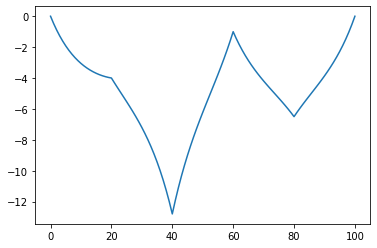

In [134]:
plt.plot(builder(depth,observation_indexes,esp_cond,N))
builder(depth,observation_indexes,esp_cond,N)

In [132]:
L_th = longueur(builder(depth,observation_indexes,esp_cond,N),Delta)
L_th


5.021750696824683
10.039486678700962
15.05393349221227
20.065685993996368
25.0752317927433
30.08297052831029
35.08922971552383
40.09427775739463
45.09833462902926
50.101580646897396
55.104163665895925
60.10620498666721
65.10780420596225
70.10904320182927
75.1099894116325
80.11069853316127
85.11121675636252
90.1115826146794
95.11182852990362
100.11198211227831
105.12185213542128
110.13129628461095
115.14050952938003
120.14967759892956
125.15898441448763
130.16861944992644
135.1787853126868
140.1897058454928
145.20163506922702
150.21486731931685
155.22974897305548
160.2466922248123
165.26619144178719
170.28884272686017
175.31536742945963
180.34664048262002
185.38372460684297
190.4279116109096
195.48077223737246
200.5442162453253
205.62139435254593
210.6870047854444
215.74317207360917
220.79165276375957
225.83390233831275
230.87113120651978
235.90435164418517
240.93441731225695
245.9620567674143
250.98790219168202
256.01251441346665
261.03640516848253
266.0600574545552
271.0839447679231
2

501.6468416918411